## Import Necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten 

## Load Dataset

In [5]:
x_train = np.loadtxt("C:/Users/punny/Desktop/deep learning/Image Classification CNN Keras Dataset/input.csv",delimiter=',')
y_train = np.loadtxt("C:/Users/punny/Desktop/deep learning/Image Classification CNN Keras Dataset/labels.csv",delimiter=',')

x_test =  np.loadtxt("C:/Users/punny/Desktop/deep learning/Image Classification CNN Keras Dataset/input_test.csv",delimiter=',')
y_test =  np.loadtxt("C:/Users/punny/Desktop/deep learning/Image Classification CNN Keras Dataset/labels_test.csv",delimiter=',')

In [7]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',y_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (2000, 30000)
shape of y_train: (2000,)
shape of x_test: (400, 30000)
shape of y_test: (400,)


In [15]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

In [17]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

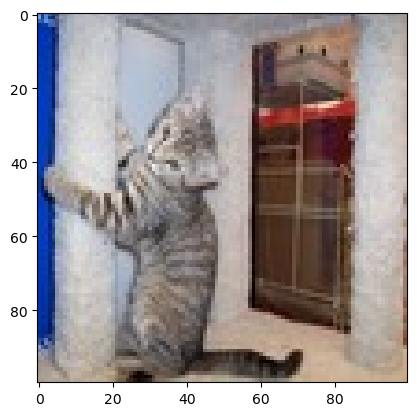

In [29]:
idx =np.random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])

## Build a model

In [31]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\punny\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
model.fit(x_train,y_train,epochs=5,batch_size=64 )

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.9193 - loss: 0.2137
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 299ms/step - accuracy: 0.9330 - loss: 0.1780
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 295ms/step - accuracy: 0.9641 - loss: 0.1323
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 298ms/step - accuracy: 0.9747 - loss: 0.0988
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 298ms/step - accuracy: 0.9849 - loss: 0.0779


In [45]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6310 - loss: 1.2221


[0.9786324501037598, 0.6825000047683716]

In [ ]:
## Predicting

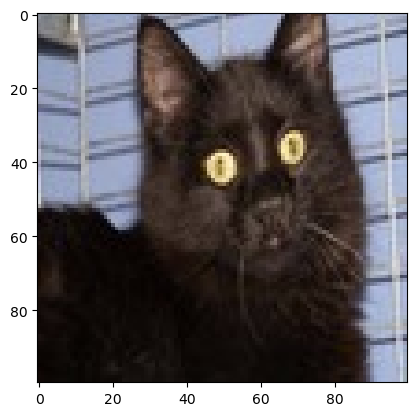

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Our model says it is a : cat


In [91]:
idx2 = np.random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()


y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred>0.5
if(y_pred == 0):
    pred ='dog'
else:
    pred='cat'

print('Our model says it is a :',pred)